<a href="https://colab.research.google.com/github/abruc13/idk/blob/main/Lab%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

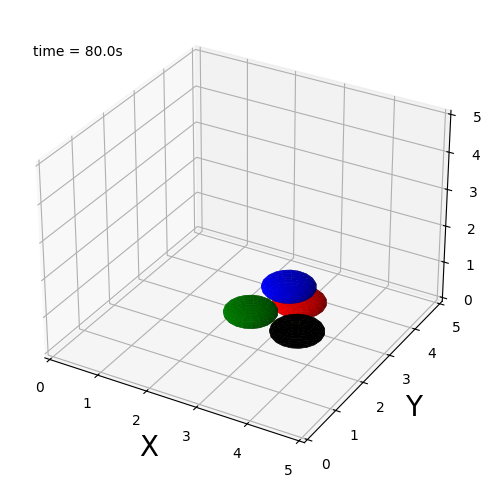

In [5]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import mpl_toolkits.mplot3d as plt3d

xmin = 0
xmax = 5
ymin = 0
ymax = 5
zmin = 0
zmax = 5

# Setting up the viewing window
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)

# Setting initial positions and velocities
x = [1.0, 2.0, 1.5, 1.5]
y = [1.0, 1.0, 1 + (0.75)**(1/2), 1 + ((0.75)**(1/2))/2]
z = [2.0, 2.0, 2.0, 2.75]
vx = [4.0, 4.0, 4.0, 3.0]
vy = [3.0, 3.0, 3.0, 2.0]
vz = [0.0, 0.0, 2.0, 1.0]

# Setting your time values
tStart = 0
tDuration = 80.0
tStop = tStart + tDuration
dt = 0.05
numberOfTimeSteps = int((tStop - tStart)/dt)

# Setting Masses, Spring strengths, natural lengths, air damping and gravity
L = 1.0
K = 125.0
C = [0.7, 0.8, 0.6, 0.9]
M = [10.0, 10.0, 10.0, 9.0]
G = 5.0

# Creating spheres
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
radius = 0.5
sphereX = np.cos(u)*np.sin(v)*radius
sphereY = np.sin(u)*np.sin(v)*radius
sphereZ = np.cos(v)*radius*radius
ball1 = ax.plot_surface(sphereX + x[0], sphereY + y[0], sphereZ + z[0], color="r")
ball2 = ax.plot_surface(sphereX + x[1], sphereY + y[1], sphereZ + z[1], color="g")
ball3 = ax.plot_surface(sphereX + x[2], sphereY + y[2], sphereZ + z[2], color="b")
ball4 = ax.plot_surface(sphereX + x[3], sphereY + y[3], sphereZ + z[3], color="k")

# Creating line to connect the spheres
line1 = plt3d.art3d.Line3D((x[0], x[1]), (y[0], y[1]), (z[0], z[1]), color = 'y')
line2 = plt3d.art3d.Line3D((x[1], x[2]), (y[1], y[2]), (z[1], z[2]), color = 'y')
line3 = plt3d.art3d.Line3D((x[2], x[0]), (y[2], y[0]), (z[2], z[0]), color = 'y')
line4 = plt3d.art3d.Line3D((x[3], x[0]), (y[3], y[0]), (z[3], z[0]), color = 'y')
line5 = plt3d.art3d.Line3D((x[3], x[1]), (y[3], y[1]), (z[3], z[1]), color = 'y')
line6 = plt3d.art3d.Line3D((x[3], x[2]), (y[3], y[2]), (z[3], z[2]), color = 'y')
lineObject1 = ax.add_line(line1)
lineObject2 = ax.add_line(line2)
lineObject3 = ax.add_line(line3)
lineObject4 = ax.add_line(line4)
lineObject5 = ax.add_line(line5)
lineObject6 = ax.add_line(line6)

# Creating the time text to put in the window
time_template = 'time = %.1fs'
time_text = ax.text2D(0.05, 0.9, '', transform=ax.transAxes)

def animate(iteration):
  global x, y, z, vx, vy, vz, K, L, C, M, G, ball1, ball2, ball3, ball4, lineObject1, lineObject2, lineObject3, lineObject4, lineObject5, lineObject6

  ball1.remove()
  ball2.remove()
  ball3.remove()
  ball4.remove()
  lineObject1.remove()
  lineObject2.remove()
  lineObject3.remove()
  lineObject4.remove()
  lineObject5.remove()
  lineObject6.remove()

  acx = [0.0, 0.0, 0.0, 0.0]
  acy = [0.0, 0.0, 0.0, 0.0]
  acz = [0.0, 0.0, 0.0, 0.0]

  # Finding the force on body j caused by the springs connected to it.
  # Where j will loop through 0, 1, 2, 3.
  j = 0
  while(j < 4):
    # Finding the force on body j caused by the spring connecting body j to body k.
    # Where k will loop through 0, 1, 2, 3.
    k = 0
    while(k < 4):
      if(j != k): # != Means not equal. If j was equal to k you would be finding the force on body j caused by itself.
                  # I know we all have internal conflicts but j should be take that up with its therapist not Google Colab.
        dx = x[k] - x[j]
        dy = y[k] - y[j]
        dz = z[k] - z[j]
        d = math.sqrt(dx*dx + dy*dy + dz*dz)
        Mag = K*(d - L)/M[j]
        acx[j] = acx[j] + Mag*(dx/d)
        acy[j] = acy[j] + Mag*(dy/d)
        acz[j] = acz[j] + Mag*(dz/d)
      k = k + 1
    j = j + 1

  # Adding on the air resistance and gravity (z is up and down)
  j = 0
  while(j < 4):
    acx[j] = acx[j] - C[j]*vx[j]/M[j]
    acy[j] = acy[j] - C[j]*vy[j]/M[j]
    acz[j] = acz[j] - C[j]*vz[j]/M[j] - G/M[j]
    j = j + 1

  j = 0
  while(j < 4):
    # Updating the velocities
    if(iteration == 0): # Moving time up a half time step on the first iteration.
      vx[j] = vx[j] + acx[j]*dt/2.0
      vy[j] = vy[j] + acy[j]*dt/2.0
      vz[j] = vz[j] + acz[j]*dt/2.0
    else:
      vx[j] = vx[j] + acx[j]*dt
      vy[j] = vy[j] + acy[j]*dt
      vz[j] = vz[j] + acz[j]*dt

    # Updating the positions
    x[j] = x[j] + vx[j]*dt
    y[j] = y[j] + vy[j]*dt
    z[j] = z[j] + vz[j]*dt

    # Bounding off walls
    if(x[j] < xmin):
      x[j] = xmin + (xmin - x[j])
      vx[j] = -vx[j]
    if(xmax < x[j]):
      x[j] = xmax - (x[j] - xmax)
      vx[j] = -vx[j]

    if(y[j] < ymin):
      y[j] = ymin + (ymin - y[j])
      vy[j] = -vy[j]
    if(ymax < y[j]):
      y[j] = ymax - (y[j] - ymax)
      vy[j] = -vy[j]

    if(z[j] < zmin):
      z[j] = zmin + (zmin - z[j])
      vz[j] = -vz[j]
    if(zmax < z[j]):
      z[j] = zmax - (z[j] - zmax)
      vz[j] = -vz[j]

    j = j + 1

  ball1 = ax.plot_surface(sphereX + x[0], sphereY + y[0], sphereZ + z[0], color="r")
  ball2 = ax.plot_surface(sphereX + x[1], sphereY + y[1], sphereZ + z[1], color="g")
  ball3 = ax.plot_surface(sphereX + x[2], sphereY + y[2], sphereZ + z[2], color="b")
  ball4 = ax.plot_surface(sphereX + x[3], sphereY + y[3], sphereZ + z[3], color="k")
  line1 = plt3d.art3d.Line3D((x[0], x[1]), (y[0], y[1]), (z[0], z[1]), color = 'y')
  line2 = plt3d.art3d.Line3D((x[1], x[2]), (y[1], y[2]), (z[1], z[2]), color = 'y')
  line3 = plt3d.art3d.Line3D((x[2], x[0]), (y[2], y[0]), (z[2], z[0]), color = 'y')
  line4 = plt3d.art3d.Line3D((x[3], x[0]), (y[3], y[0]), (z[3], z[0]), color = 'y')
  line5 = plt3d.art3d.Line3D((x[3], x[1]), (y[3], y[1]), (z[3], z[1]), color = 'y')
  line6 = plt3d.art3d.Line3D((x[3], x[2]), (y[3], y[2]), (z[3], z[2]), color = 'y')
  lineObject1 = ax.add_line(line1)
  lineObject2 = ax.add_line(line2)
  lineObject3 = ax.add_line(line3)
  lineObject4 = ax.add_line(line4)
  lineObject5 = ax.add_line(line5)
  lineObject6 = ax.add_line(line6)
  time_text.set_text(time_template % (iteration*dt))
  return lineObject1, lineObject2, lineObject3, ball1, ball2, ball3, time_text

anim = animation.FuncAnimation(fig, animate,
                               frames=numberOfTimeSteps,
                               interval=20,
                               blit=True)

HTML(anim.to_html5_video())